# **PLOTS**
<hr>

## **Authors:**
- **Montero**, Charles Vincent
- **Pazon**, Nikolai Tristan

<hr>


## **Bar Graph Plot**
<hr>

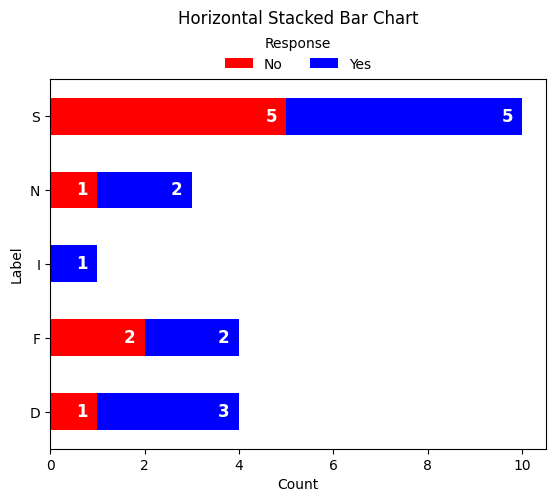

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


bar_df = pd.read_csv("bar_assignment.csv")

bar_df["COUNT"] = bar_df["COUNT"].map({0: "No", 1: "Yes"})

bar_pivot = bar_df.pivot_table(index="LABEL", columns="COUNT", aggfunc="size", fill_value=0)

ax = bar_pivot.plot(kind="barh", stacked=True, color=["red", "blue"])

plt.xlabel("Count")
plt.ylabel("Label")
plt.title("Horizontal Stacked Bar Chart", pad=40)

plt.legend(
    title="Response",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),  
    ncol=2,
    frameon=False
)

for bars, color in zip(ax.containers, ["red", "blue"]):  
    for bar in bars:
        width = bar.get_width()
        if width > 0:  
            ax.text(
                bar.get_x() + width - 0.2,  
                bar.get_y() + bar.get_height() / 2,  
                int(width),  
                ha='right',  
                va='center',
                fontsize=12,
                fontweight='bold',
                color='white'
            )

plt.show()

## **Sankey Diagram Plot**
<hr>

In [33]:
import pandas as pd
import plotly.graph_objects as go

file_path = "sankey_assignment.csv"
sankey_df = pd.read_csv(file_path)

df_prep = sankey_df.melt(id_vars=['LABEL'], var_name='source', value_name='value')
df_prep.rename(columns={'LABEL': 'target'}, inplace=True)
df_prep = df_prep[['source', 'target', 'value']]

df_temp1 = df_prep[:40]
df_temp2 = df_prep[40:].rename(columns={'target': 'source', 'source': 'target'})

links = pd.concat([df_temp1, df_temp2], axis=0)

unique_source_target = list(pd.unique(links[['source', 'target']].values.ravel('K')))
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}

links['source'] = links['source'].map(mapping_dict)
links['target'] = links['target'].map(mapping_dict)

links_dict = links.to_dict(orient='list')

hex_colors = [
    "#f2a481", "#54afa9", "#f09135", "#ed74b2", "#98ba93", "#5ccbcf", "#f9d749", "#ad5ecd",
    "#96cdf6", "#5481b0", "#6d9c9f", "#6d95e6", "#53bdf9", "#60b077", "#aff8a2", "#a6eb99"
]
node_colors = {node: hex_colors[i % len(hex_colors)] for i, node in enumerate(unique_source_target)}

fig = go.Figure(data=[go.Sankey(
   node=dict(
        pad=10,  # Reduce padding between nodes
        thickness=15,  # Reduce node thickness
        line=dict(color='black', width=0.5),
        label=unique_source_target,
        color=[node_colors[node] for node in unique_source_target],
   ),
   link=dict(
        source=links_dict['source'],
        target=links_dict['target'],
        value=links_dict['value'],
        color=[node_colors[unique_source_target[src]] for src in links_dict['source']]
   )
)])

fig.update_layout(
    title_text="Sankey Diagram",
    font_size=14,
    font_weight="bold",
    width=800,  
    height=600,  
    margin=dict(l=10, r=10, t=40, b=10)  
)

fig.show()


## **Network Graph**
<hr>

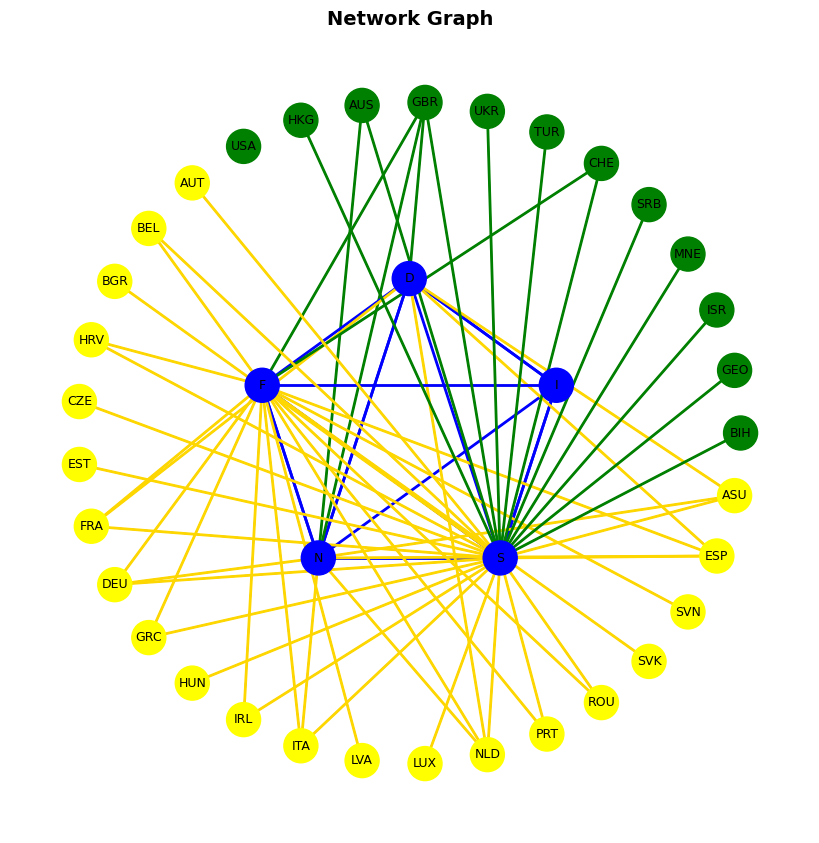

In [35]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

file_path = 'networks_assignment.csv'
data = pd.read_csv(file_path)

G = nx.Graph()

nodes = list(data.columns[1:])
G.add_nodes_from(nodes)

for index, row in data.iterrows():
    source = row['LABELS']
    for target in nodes:
        if row[target] > 0:
            G.add_edge(source, target)

# Ensure USA is added even if disjointed
if 'USA' not in G.nodes:
    G.add_node('USA')

# Define categories
central_nodes = ['D', 'F', 'I', 'N', 'S']
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']
yellow_nodes = [node for node in nodes if node not in central_nodes + green_nodes]

pos = {}

pentagram_scale = 0.7  
pentagram_coords = [
    (0, pentagram_scale),  # Top
    (-0.951 * pentagram_scale, 0.309 * pentagram_scale),  
    (0.951 * pentagram_scale, 0.309 * pentagram_scale),  
    (-0.588 * pentagram_scale, -0.809 * pentagram_scale), 
    (0.588 * pentagram_scale, -0.809 * pentagram_scale)  
]
for i, node in enumerate(central_nodes):
    pos[node] = pentagram_coords[i]

circle_scale = 1.5  
circle_nodes = green_nodes + yellow_nodes
angle_step = 2 * np.pi / len(circle_nodes)

for i, node in enumerate(circle_nodes):
    angle = i * angle_step
    pos[node] = (circle_scale * np.cos(angle), circle_scale * np.sin(angle))

if 'USA' in G.nodes:
    usa_index = circle_nodes.index('USA') if 'USA' in circle_nodes else len(circle_nodes) // 2
    angle = usa_index * angle_step
    pos['USA'] = (circle_scale * np.cos(angle), circle_scale * np.sin(angle))

node_colors = {
    **{node: 'blue' for node in central_nodes if node in G.nodes},  
    **{node: 'green' for node in green_nodes if node in G.nodes},  
    **{node: 'yellow' for node in yellow_nodes if node in G.nodes}  
}

pentagram_edges = [('D', 'I'), ('I', 'S'), ('S', 'F'), ('F', 'N'), ('N', 'D')]

edge_colors = {}

for edge in pentagram_edges:
    if edge in G.edges or (edge[1], edge[0]) in G.edges:
        edge_colors[edge] = 'blue'
        edge_colors[(edge[1], edge[0])] = 'blue'  

for u, v in G.edges():
    if (u, v) in pentagram_edges or (v, u) in pentagram_edges:
        continue  

    if u in green_nodes and v in central_nodes or v in green_nodes and u in central_nodes:
        edge_colors[(u, v)] = 'green'  
    elif u in yellow_nodes and v in central_nodes or v in yellow_nodes and u in central_nodes:
        edge_colors[(u, v)] = 'gold'  
    elif u in green_nodes and v in green_nodes:
        edge_colors[(u, v)] = 'blue'  
    elif u in yellow_nodes and v in yellow_nodes:
        edge_colors[(u, v)] = 'orange'  
    else:
        edge_colors[(u, v)] = 'blue'  

plt.figure(figsize=(8, 8)) 

nx.draw(G, pos, with_labels=True, 
        node_color=[node_colors.get(node, 'gray') for node in G.nodes], 
        node_size=600, font_size=9)

for (u, v), color in edge_colors.items():
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=color, width=2)

plt.title("Network Graph", fontsize=14, fontweight='bold')
plt.show()


## **Collated Graphs**
<hr>

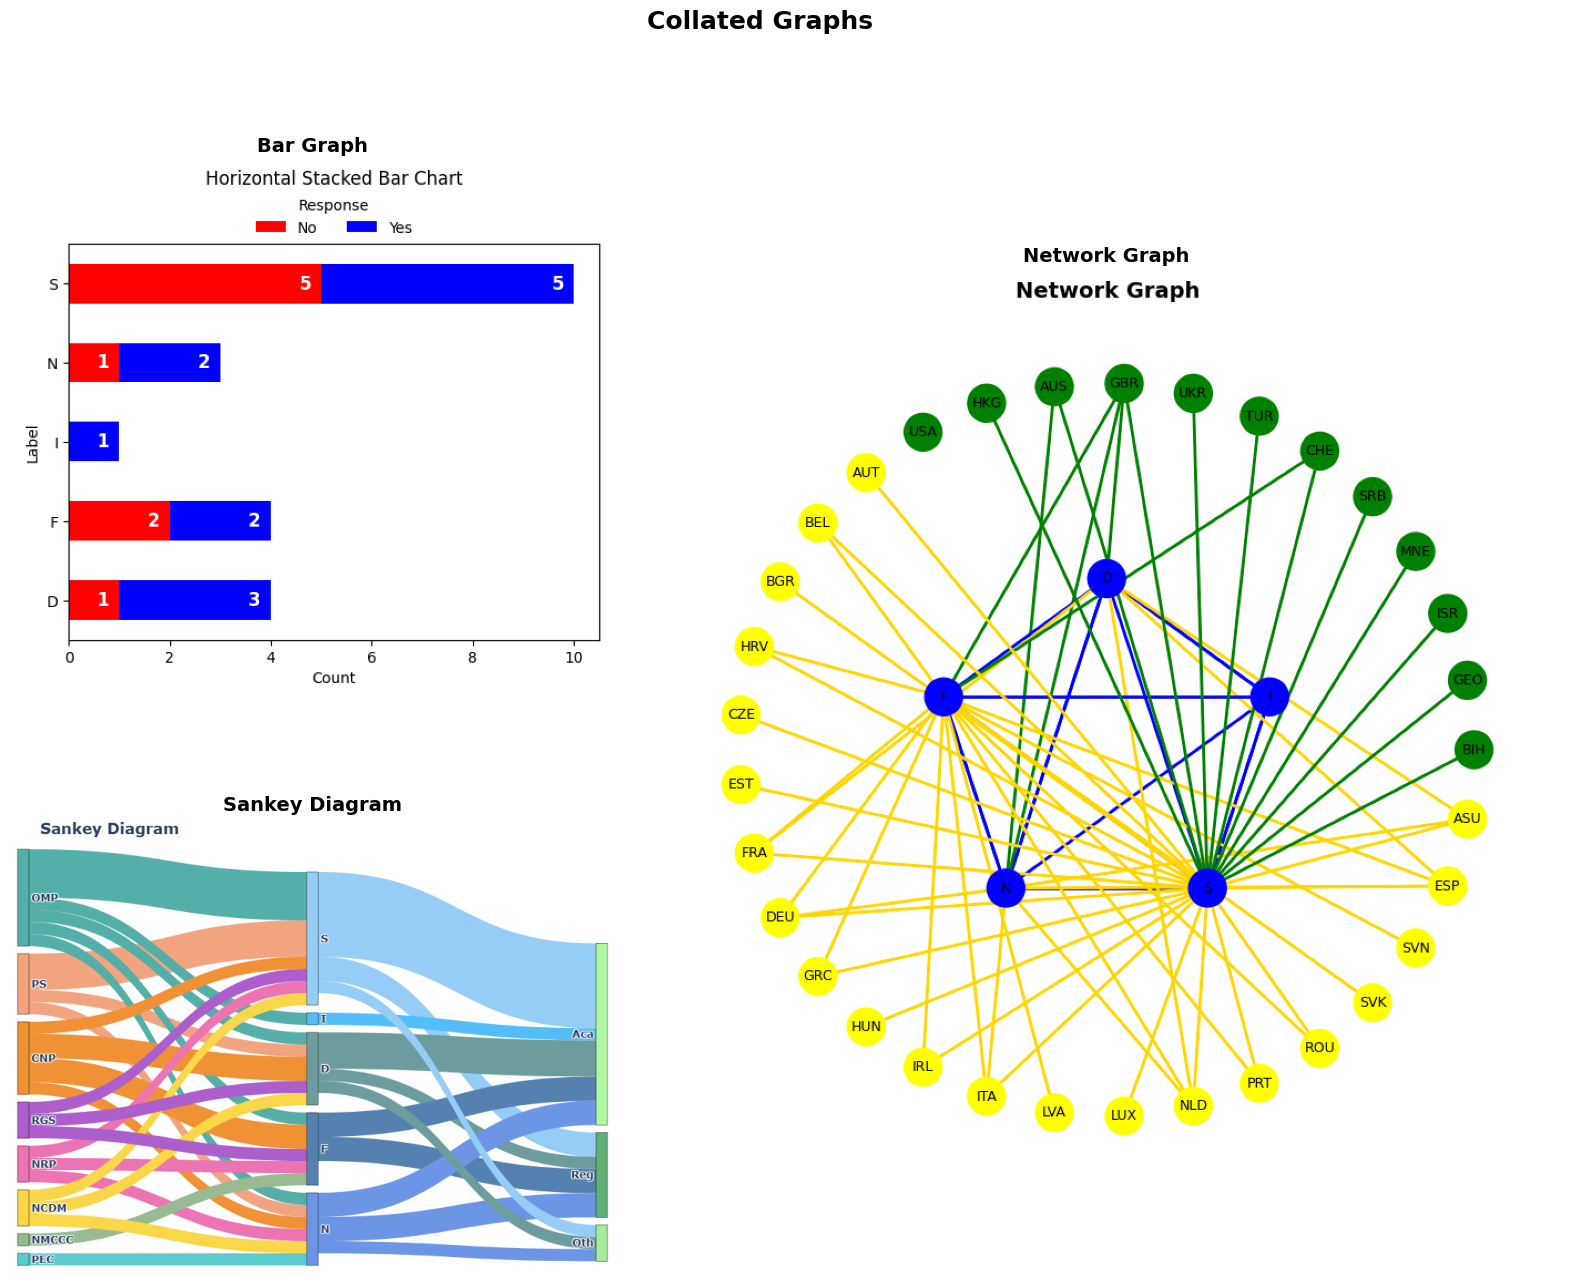

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

# Load images
images = {
    "Bar Graph": mpimg.imread("Bar Graph Image.png"),
    "Sankey Diagram": mpimg.imread("Sankey Diagram Image.png"),
    "Network Graph": mpimg.imread("Network Graph Image.png")
}

# Define figure and grid layout
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1.5], height_ratios=[1, 1])

# Create subplots for each image with titles
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(images["Bar Graph"])
ax1.set_title("Bar Graph", fontsize=14, fontweight='bold')
ax1.axis('off')

ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(images["Sankey Diagram"])
ax2.set_title("Sankey Diagram", fontsize=14, fontweight='bold')
ax2.axis('off')

ax3 = fig.add_subplot(gs[:, 1])  # Network graph spans both rows
ax3.imshow(images["Network Graph"])
ax3.set_title("Network Graph", fontsize=14, fontweight='bold')
ax3.axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.15)
plt.suptitle("Collated Graphs", fontsize=18, fontweight='bold', color='black')

plt.show()
